Menghubungkan Google Colab dengan Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Menginstal library yang digunakan

In [2]:
!pip install -q svgpathtools numpy opencv-python

Mengimpor library dan module yang akan digunakan

In [3]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from svgpathtools import parse_path
from xml.dom import minidom

Menginput folder yang berisikan file .svg dan membuat folder baru untuk hasil binary masking yang telah dilakukan

In [4]:
input_folder = "/content/drive/MyDrive/Final/SVG"
output_folder = "/content/drive/MyDrive/Final/Mask"

os.makedirs(output_folder, exist_ok=True)

Saved mask: 7.png


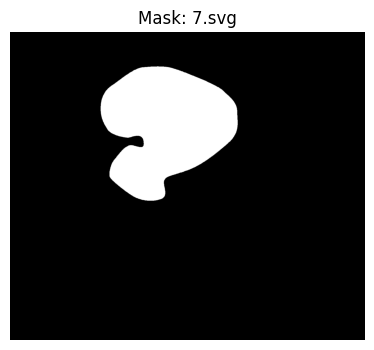

Saved mask: 2.png


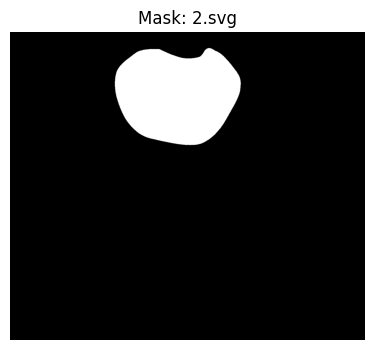

Saved mask: 4.png


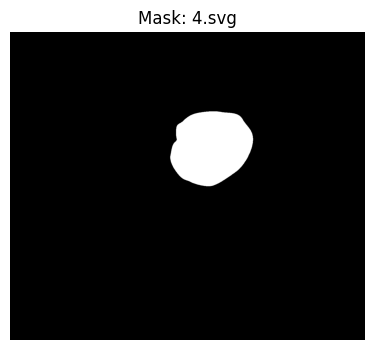

Saved mask: 9.png


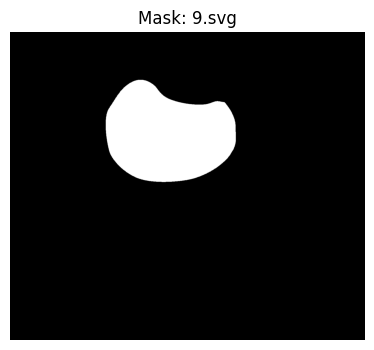

Saved mask: 3.png


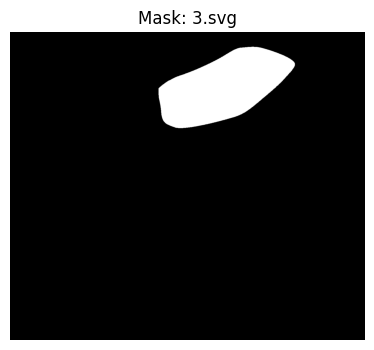

Saved mask: 6.png


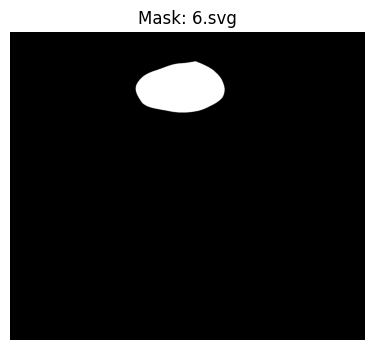

Saved mask: 11.png


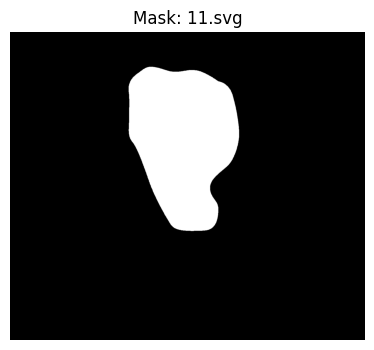

Saved mask: 12.png


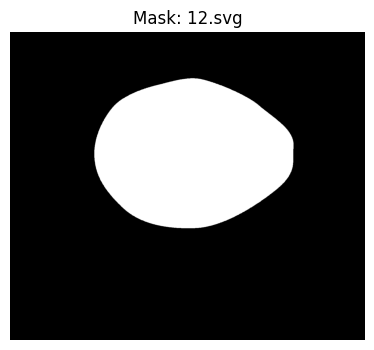

Saved mask: 10.png


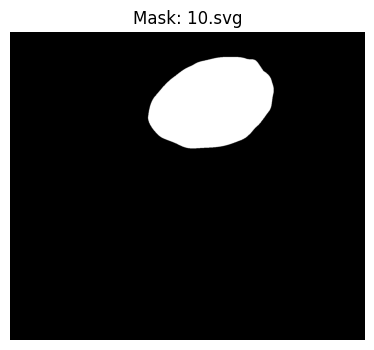

Saved mask: 1.png


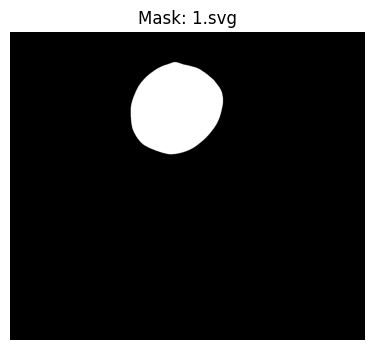

Saved mask: 5.png


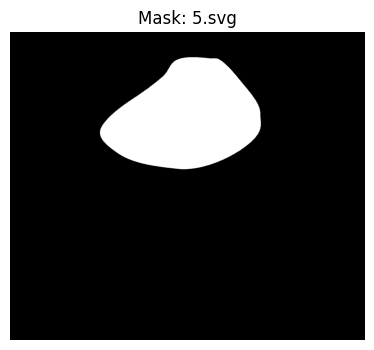

Saved mask: 8.png


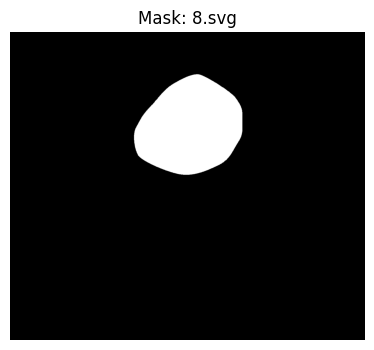

Saved mask: 20.png


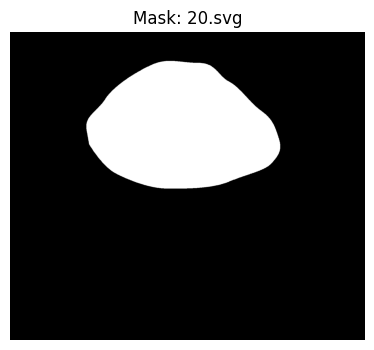

Saved mask: 22.png


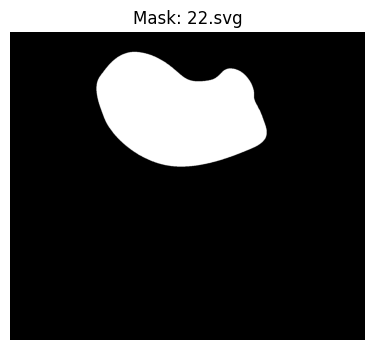

Saved mask: 21.png


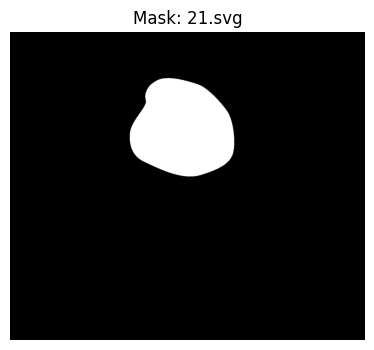

Saved mask: 13.png


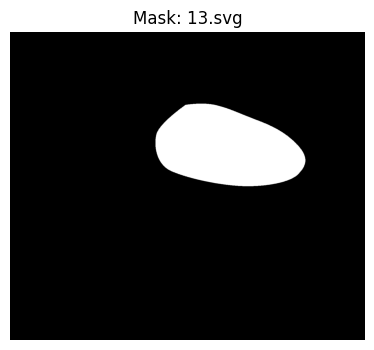

Saved mask: 16.png


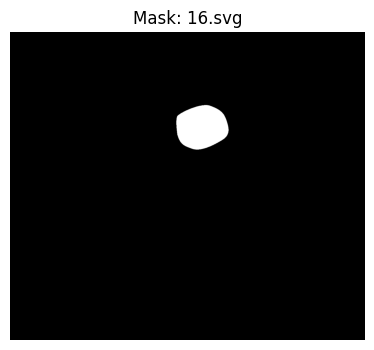

Saved mask: 17.png


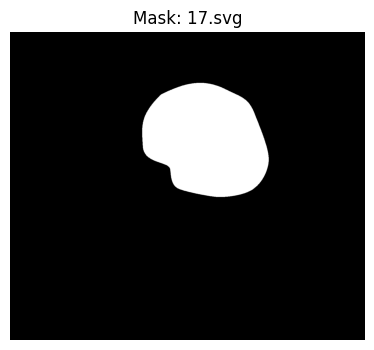

Saved mask: 14.png


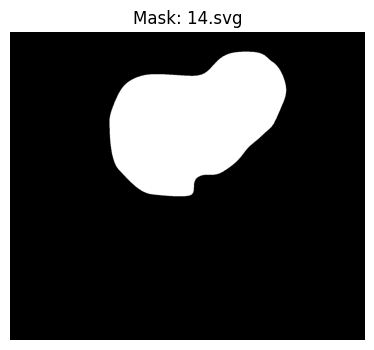

Saved mask: 18.png


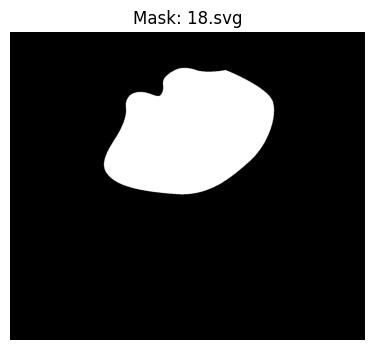

Saved mask: 15.png


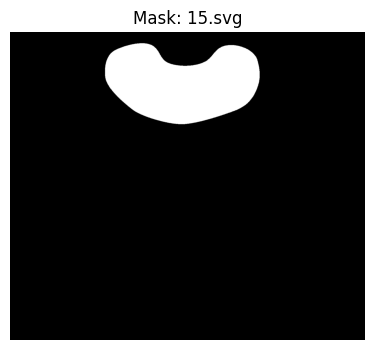

Saved mask: 19.png


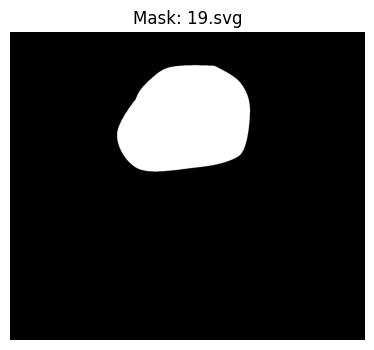

Saved mask: 86.png


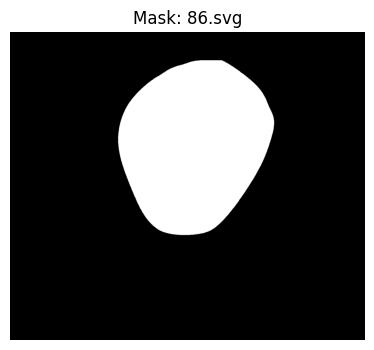

Saved mask: 85.png


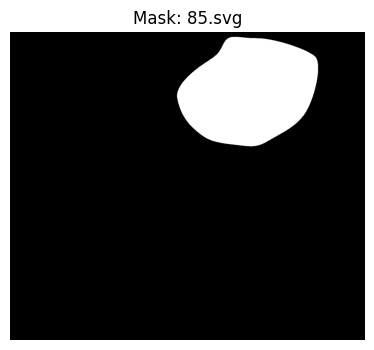

Saved mask: 84.png


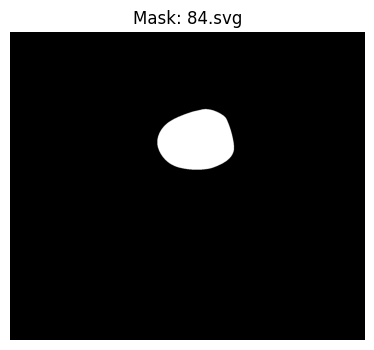

Saved mask: 82.png


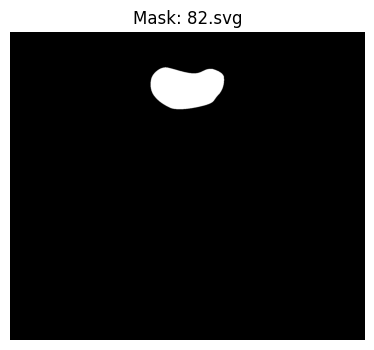

Saved mask: 80.png


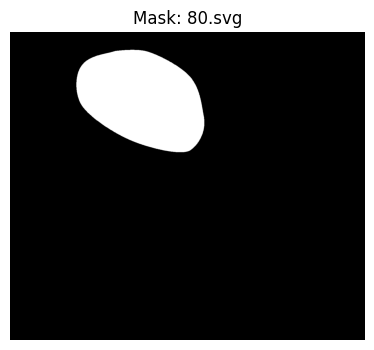

Saved mask: 83.png


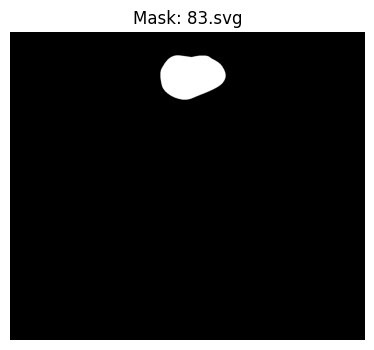

Saved mask: 78.png


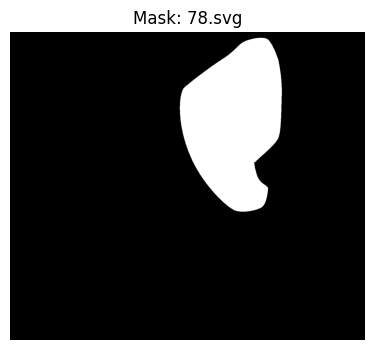

Saved mask: 79.png


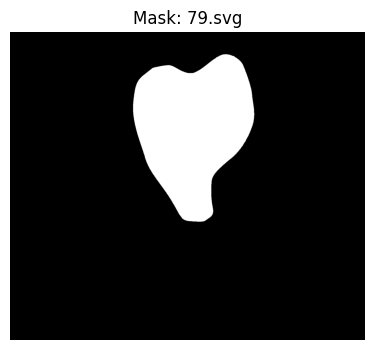

Saved mask: 77.png


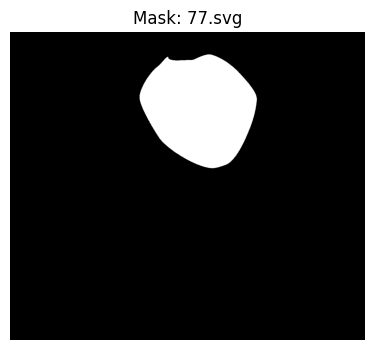

Saved mask: 67.png


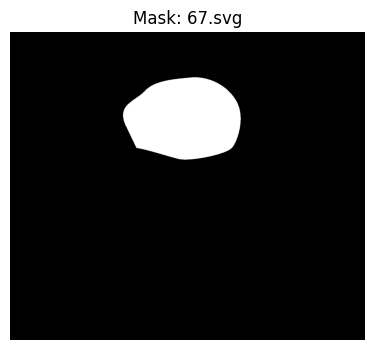

Saved mask: 76.png


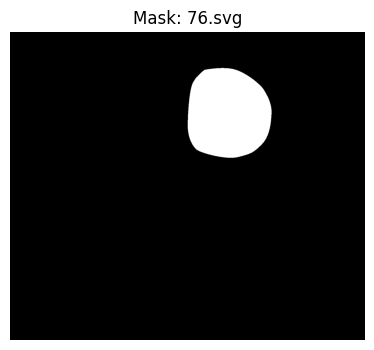

Saved mask: 66.png


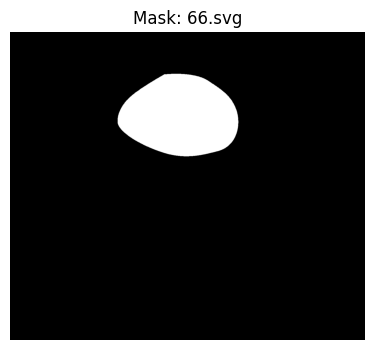

Saved mask: 74.png


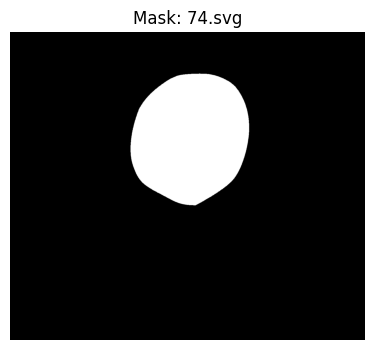

Saved mask: 75.png


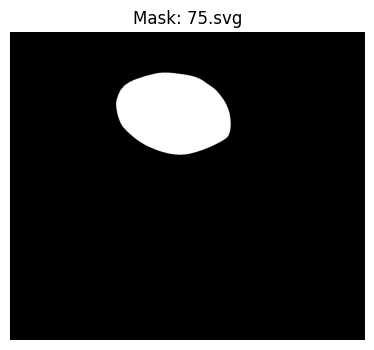

Saved mask: 73.png


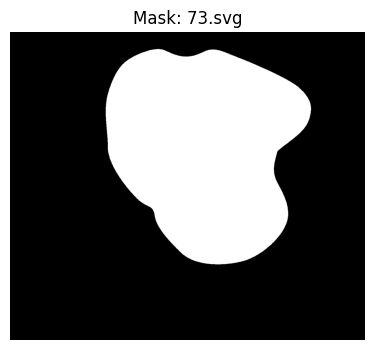

Saved mask: 61.png


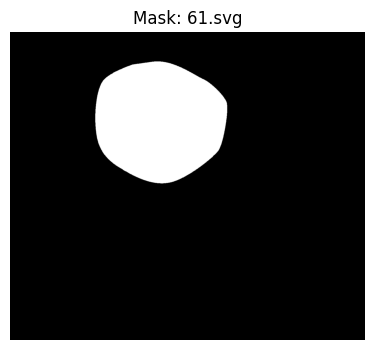

Saved mask: 64.png


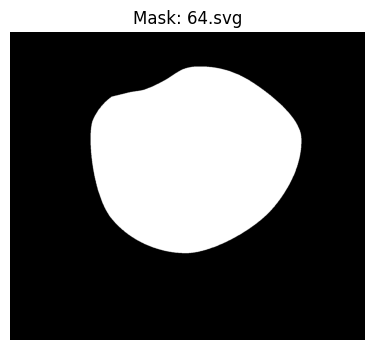

Saved mask: 65.png


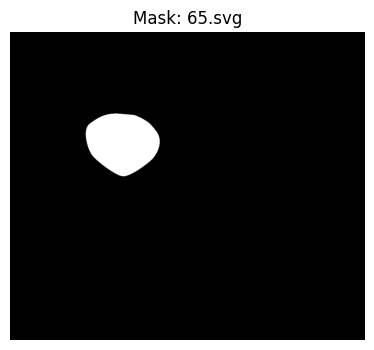

Saved mask: 58.png


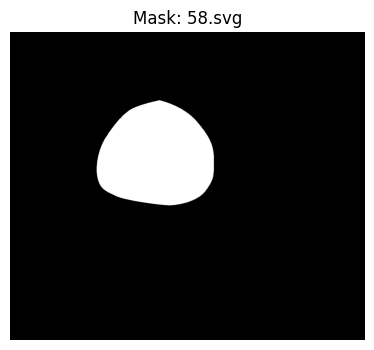

Saved mask: 68.png


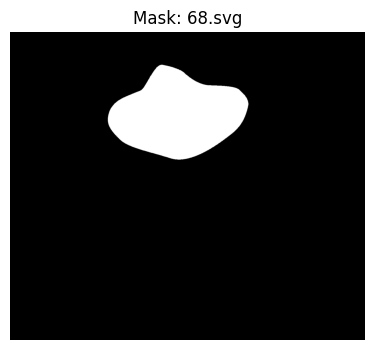

Saved mask: 63.png


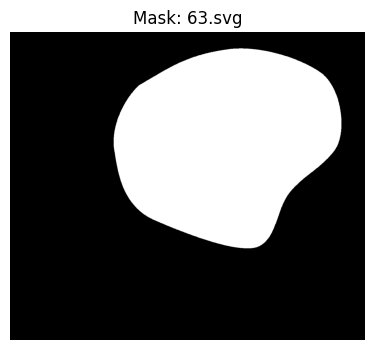

Saved mask: 50.png


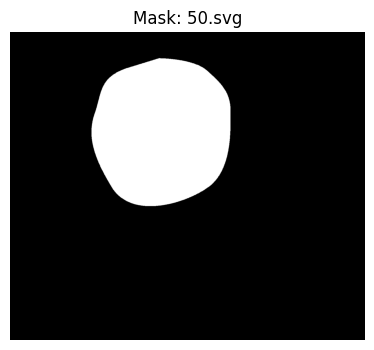

Saved mask: 49.png


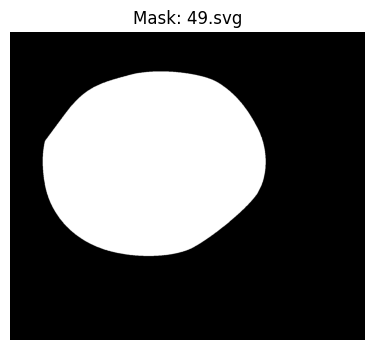

Saved mask: 51.png


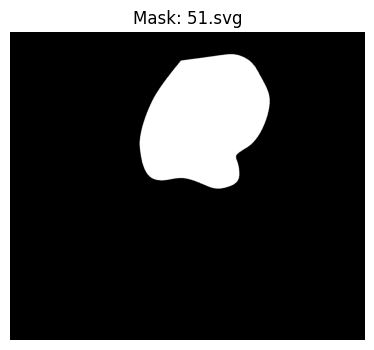

Saved mask: 52.png


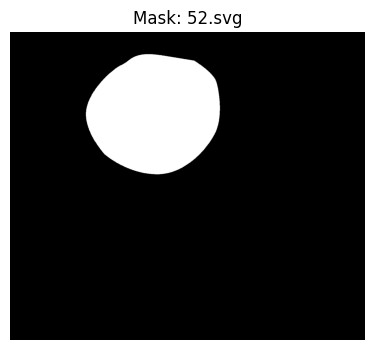

Saved mask: 60.png


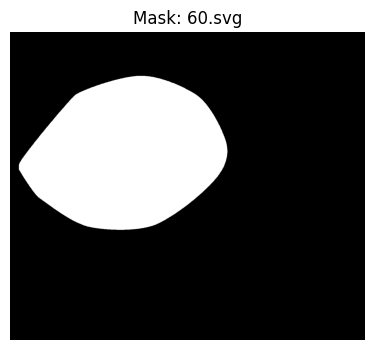

Saved mask: 57.png


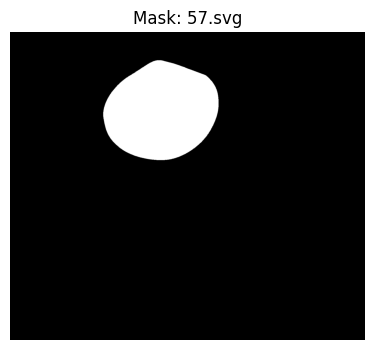

Saved mask: 53.png


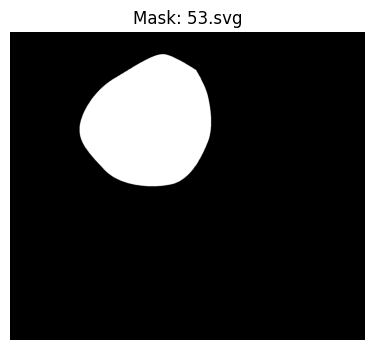

Saved mask: 56.png


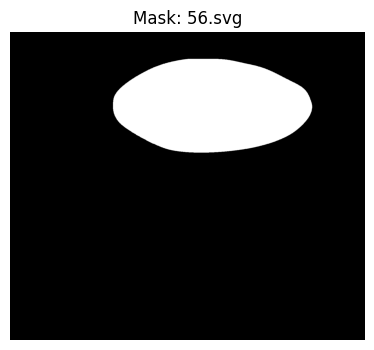

Saved mask: 48.png


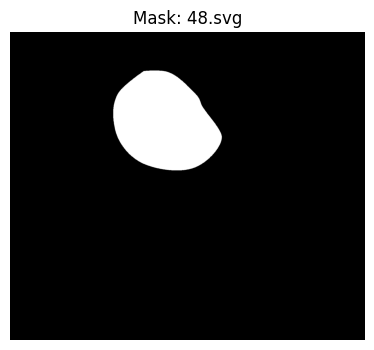

Saved mask: 45.png


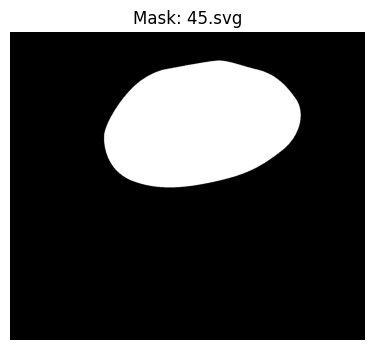

Saved mask: 55.png


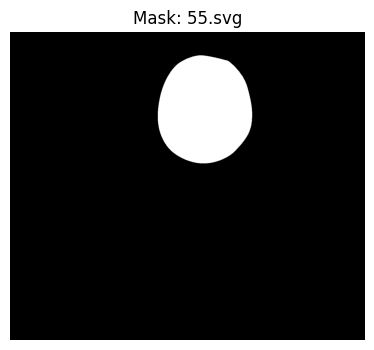

Saved mask: 47.png


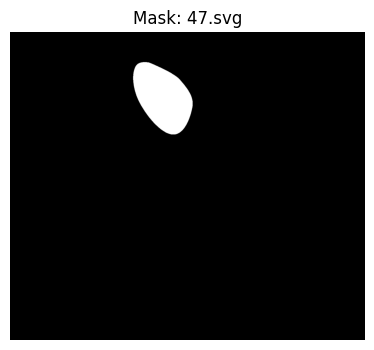

Saved mask: 72.png


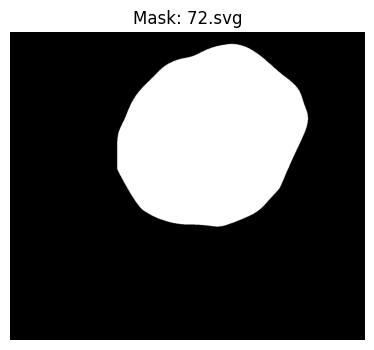

Saved mask: 59.png


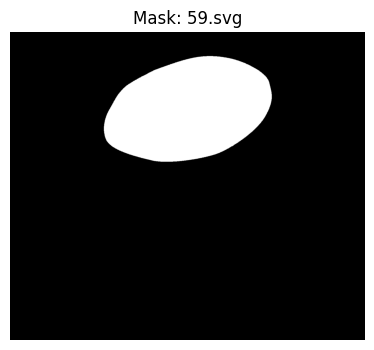

Saved mask: 62.png


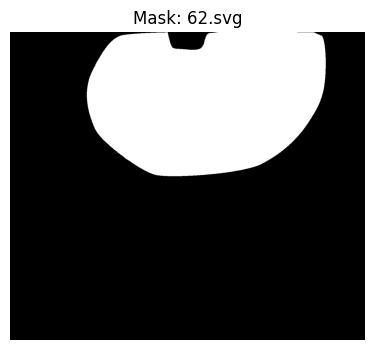

Saved mask: 69.png


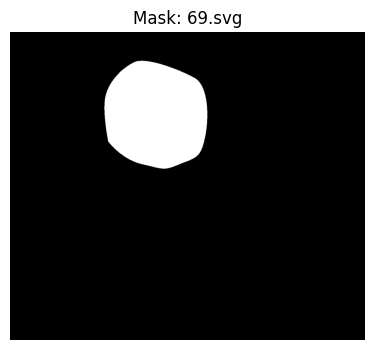

Saved mask: 70.png


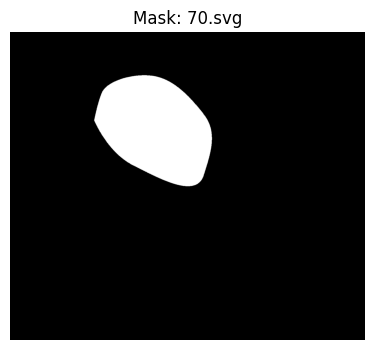

Saved mask: 71.png


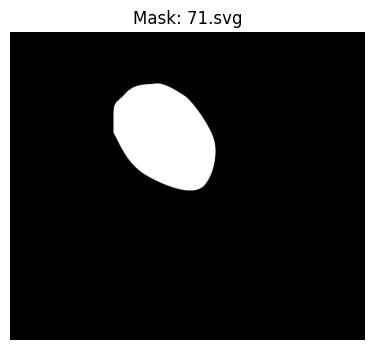

Saved mask: 25.png


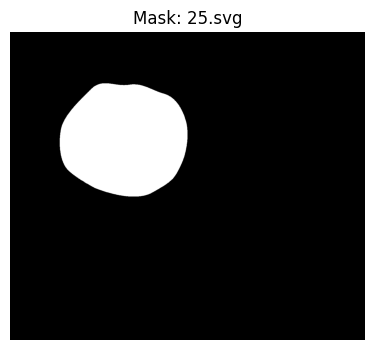

Saved mask: 36.png


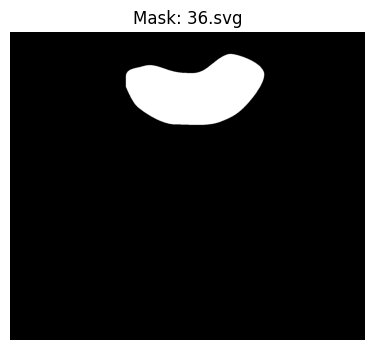

Saved mask: 27.png


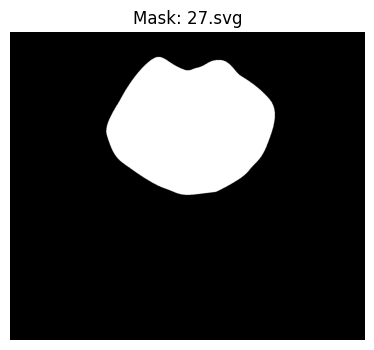

Saved mask: 33.png


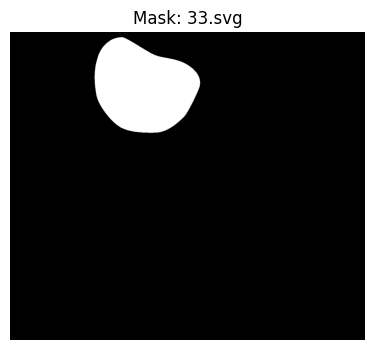

Saved mask: 29.png


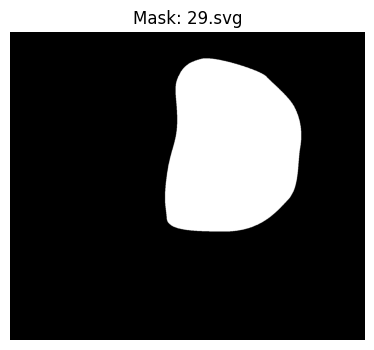

Saved mask: 40.png


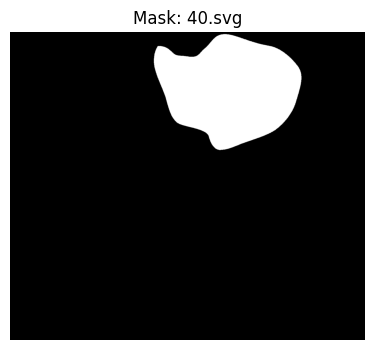

Saved mask: 35.png


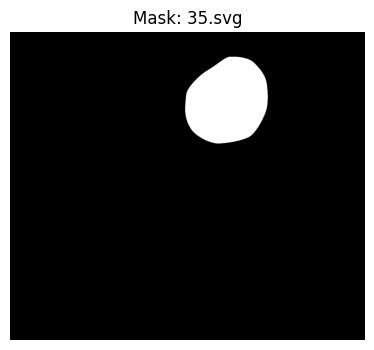

Saved mask: 34.png


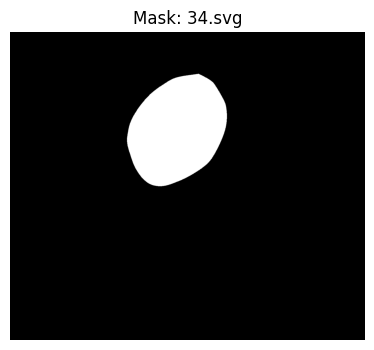

Saved mask: 43.png


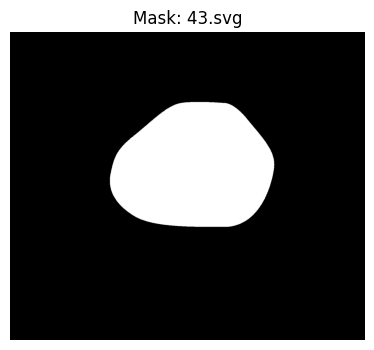

Saved mask: 37.png


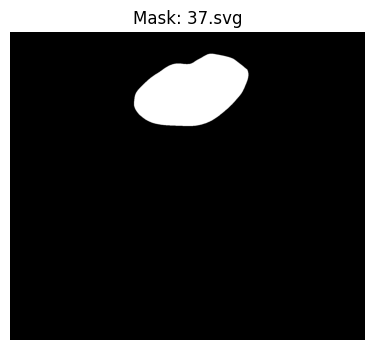

Saved mask: 32.png


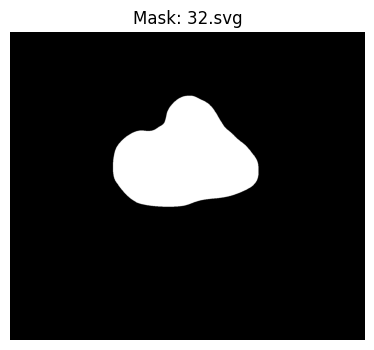

Saved mask: 28.png


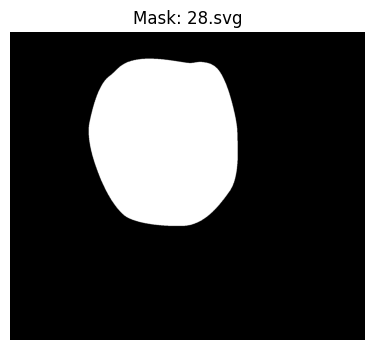

Saved mask: 42.png


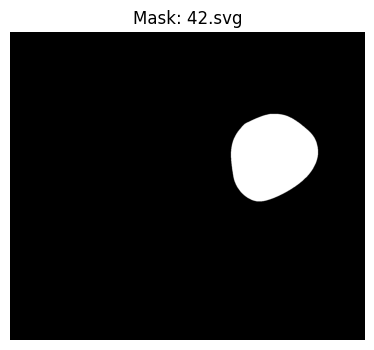

Saved mask: 31.png


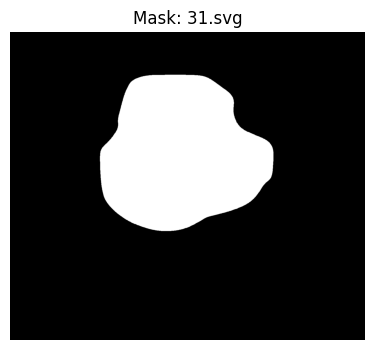

Saved mask: 38.png


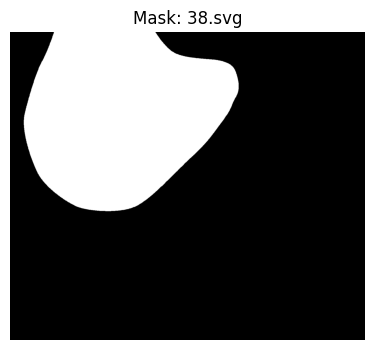

Saved mask: 44.png


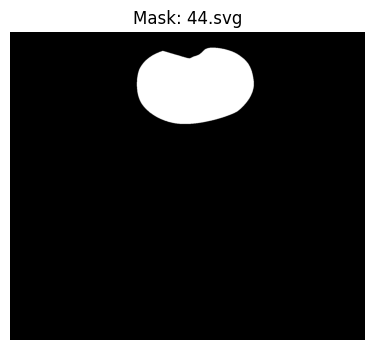

Saved mask: 46.png


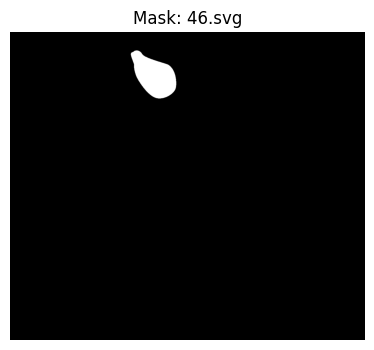

Saved mask: 26.png


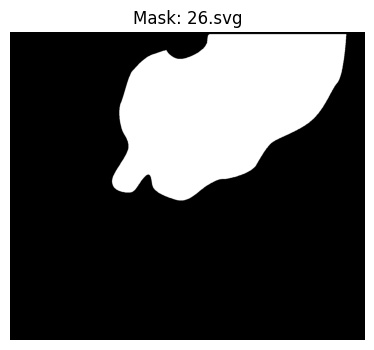

Saved mask: 39.png


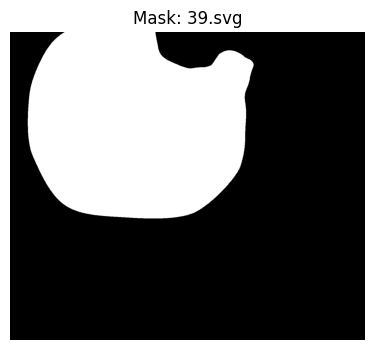

Saved mask: 30.png


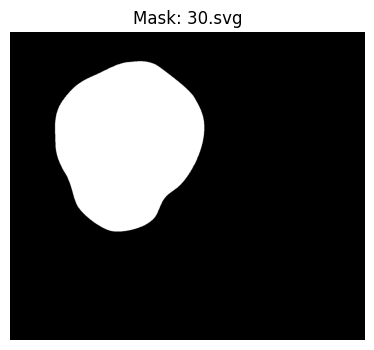

Saved mask: 41.png


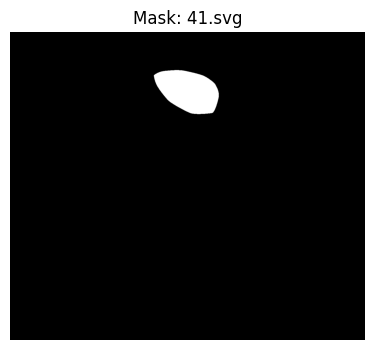

Saved mask: 24.png


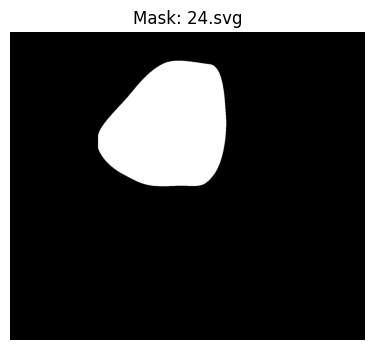

Saved mask: 23.png


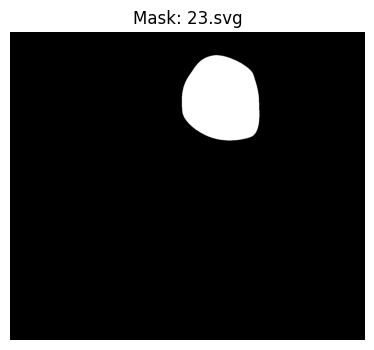

Saved mask: 122.png


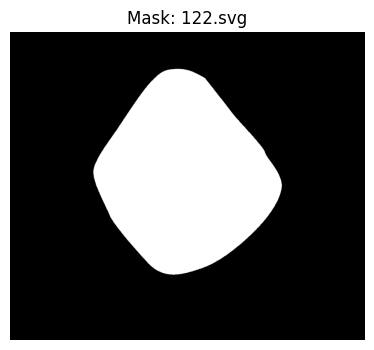

Saved mask: 130.png


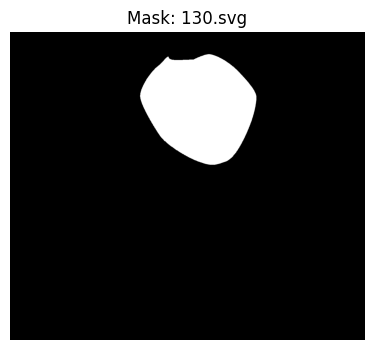

Saved mask: 129.png


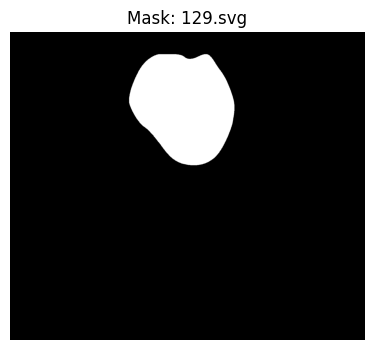

Saved mask: 119.png


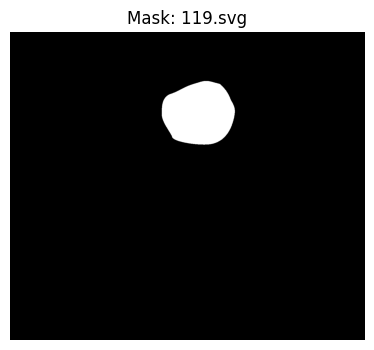

Saved mask: 128.png


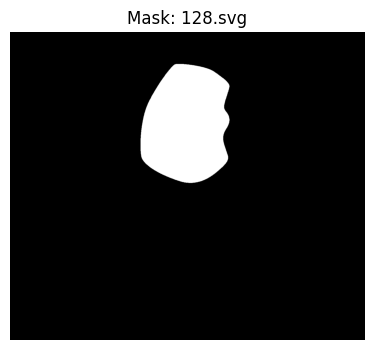

Saved mask: 127.png


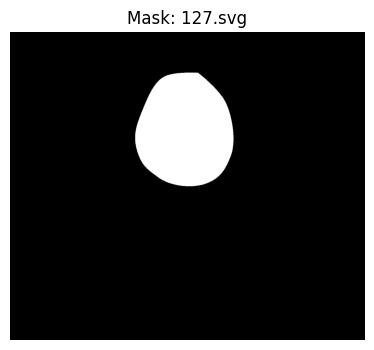

Saved mask: 125.png


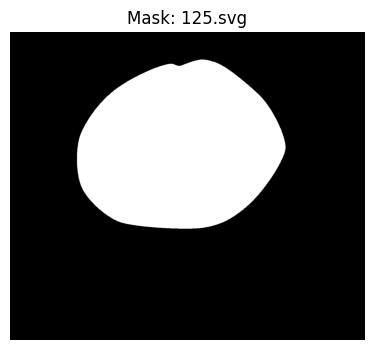

Saved mask: 126.png


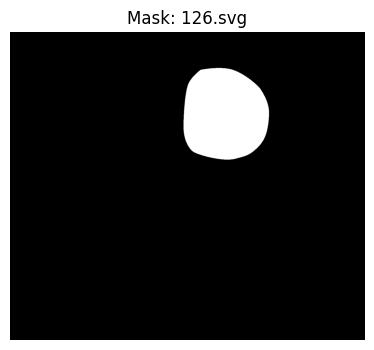

Saved mask: 124.png


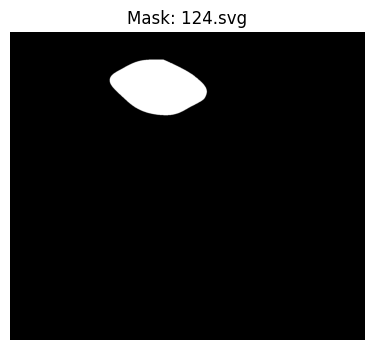

Saved mask: 123.png


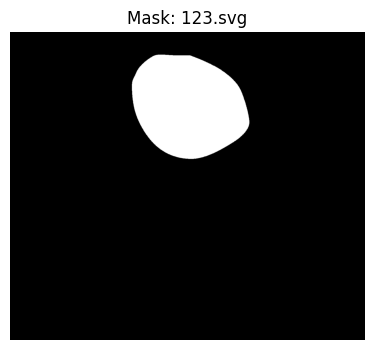

Saved mask: 121.png


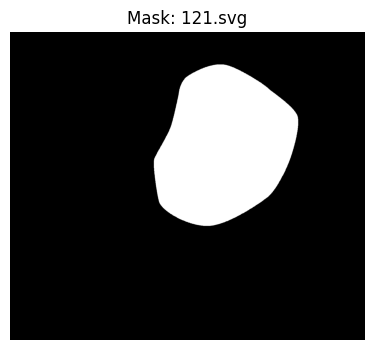

Saved mask: 120.png


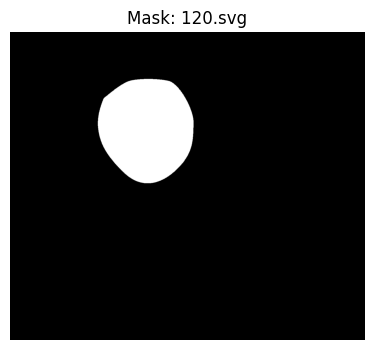

Saved mask: 118.png


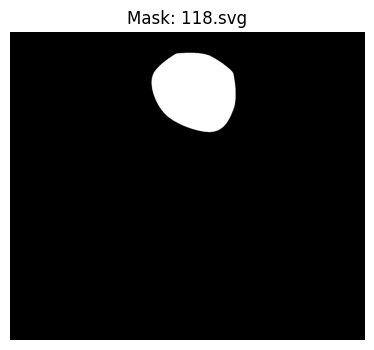

Saved mask: 117.png


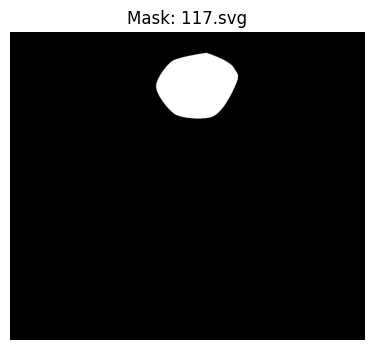

Saved mask: 87.png


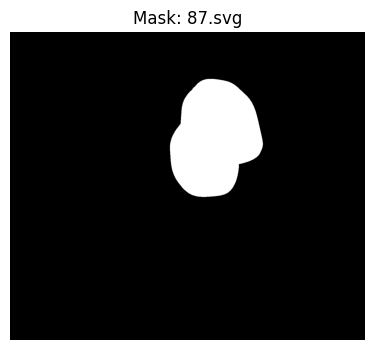

Saved mask: 116.png


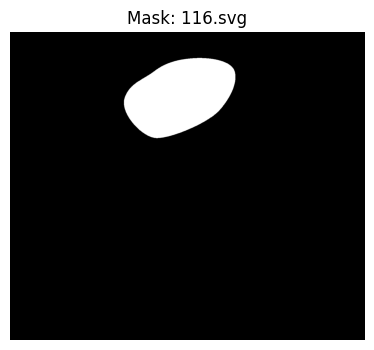

Saved mask: 107.png


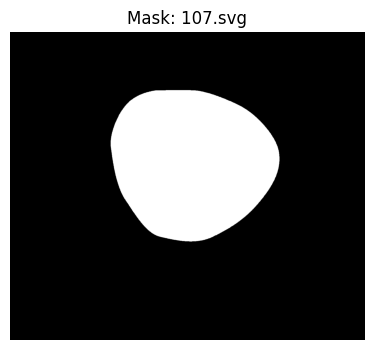

Saved mask: 115.png


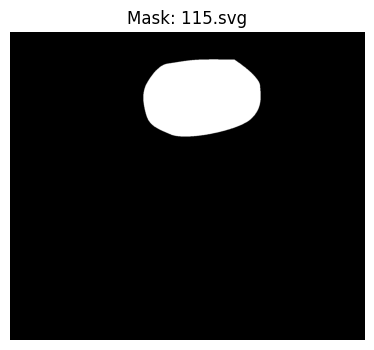

Saved mask: 114.png


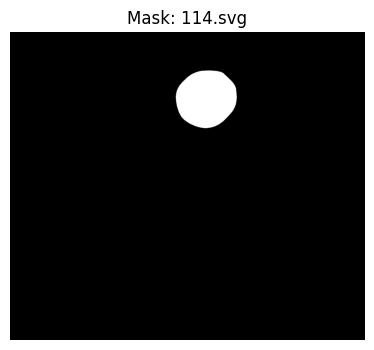

Saved mask: 113.png


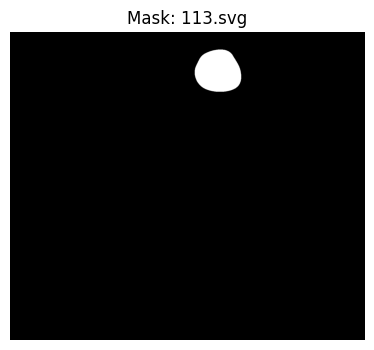

Saved mask: 112.png


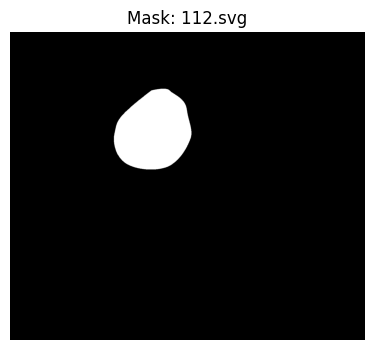

Saved mask: 104.png


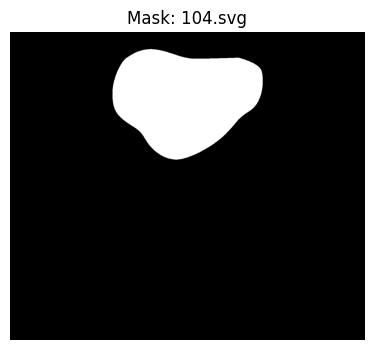

Saved mask: 97.png


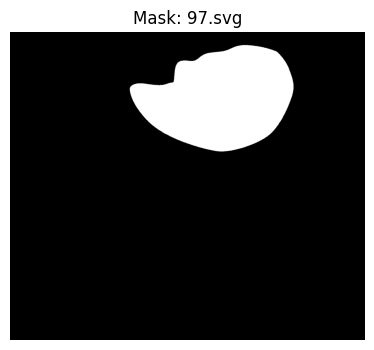

Saved mask: 102.png


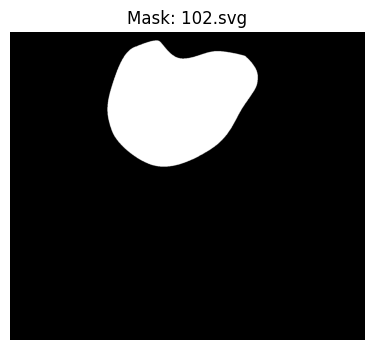

Saved mask: 105.png


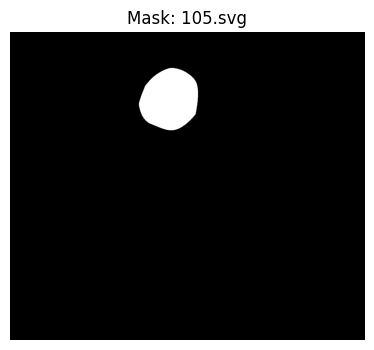

Saved mask: 96.png


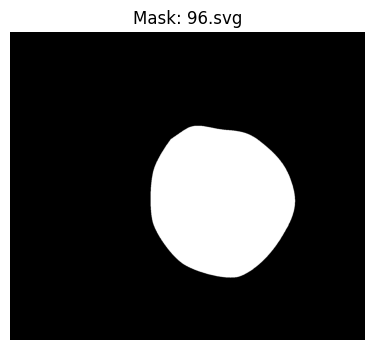

Saved mask: 54.png


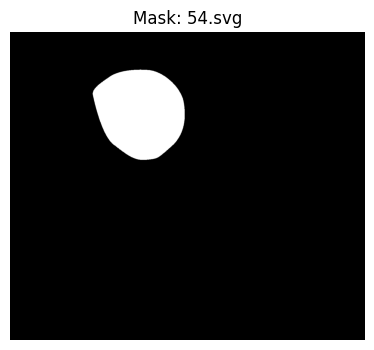

Saved mask: 103.png


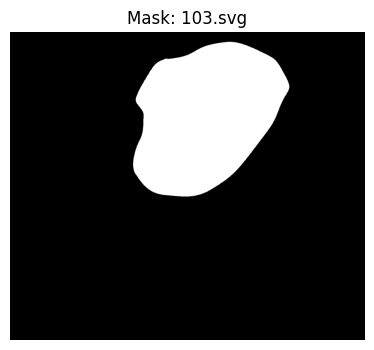

Saved mask: 90.png


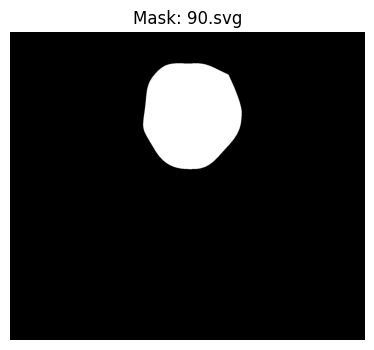

Saved mask: 88.png


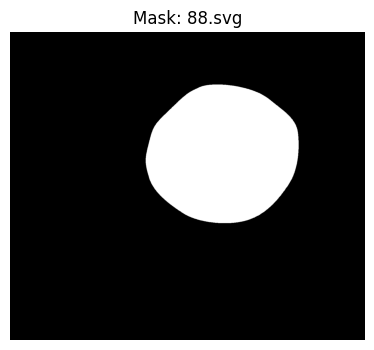

Saved mask: 81.png


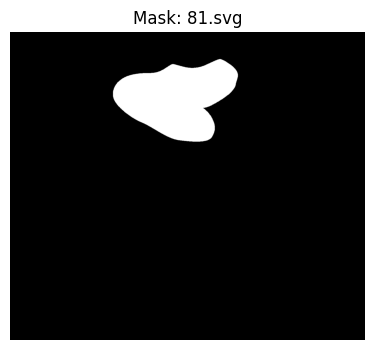

Saved mask: 94.png


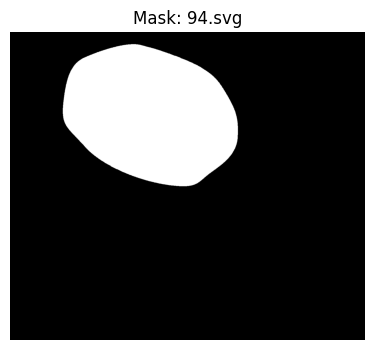

Saved mask: 92.png


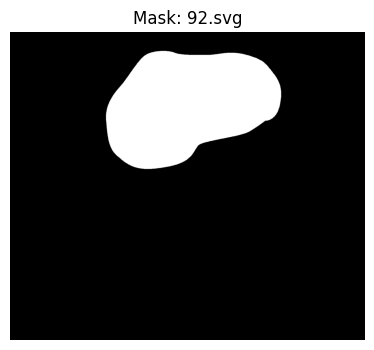

Saved mask: 93.png


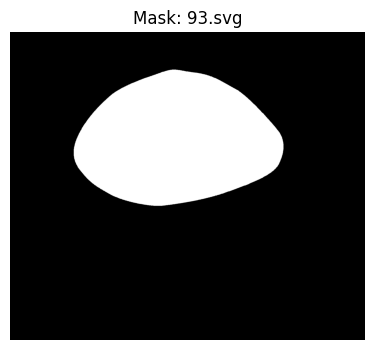

Saved mask: 99.png


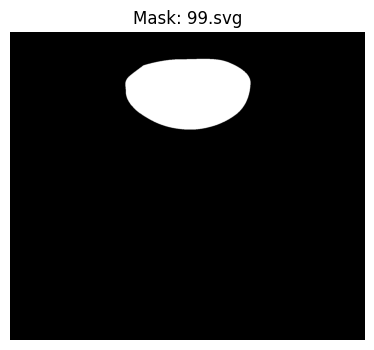

Saved mask: 95.png


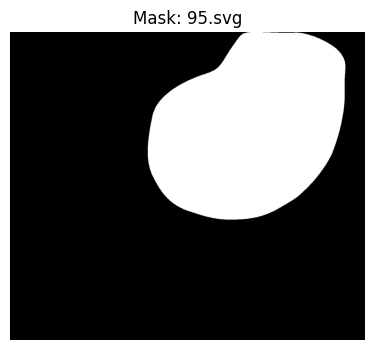

Saved mask: 106.png


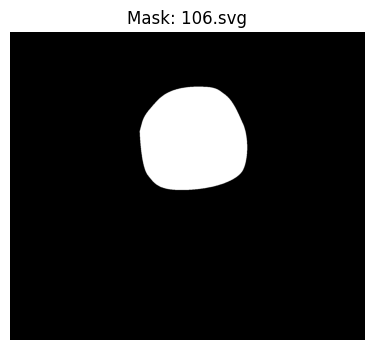

Saved mask: 101.png


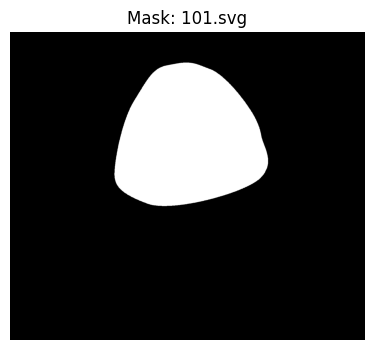

Saved mask: 89.png


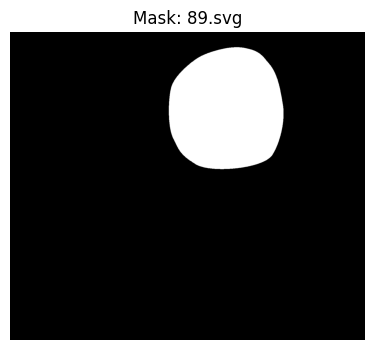

Saved mask: 91.png


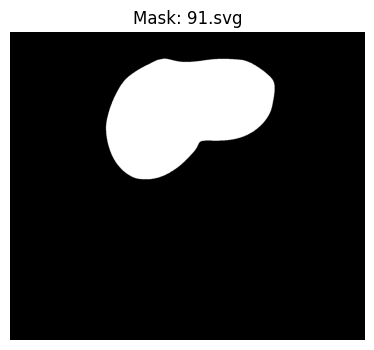

Saved mask: 110.png


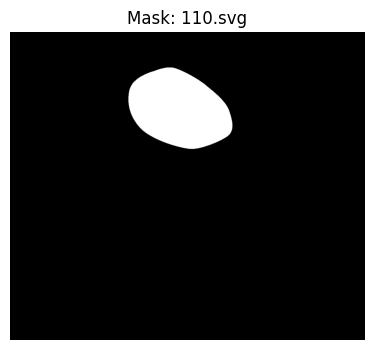

Saved mask: 111.png


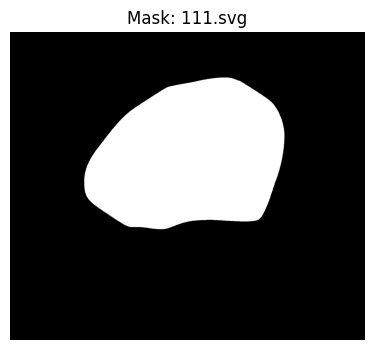

Saved mask: 109.png


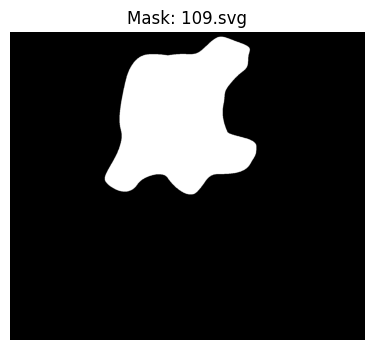

Saved mask: 100.png


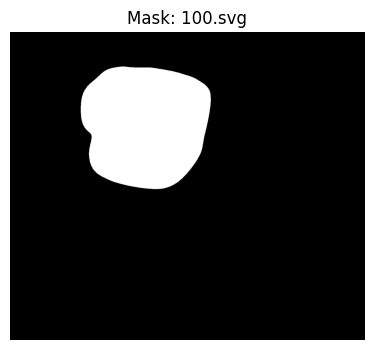

Saved mask: 108.png


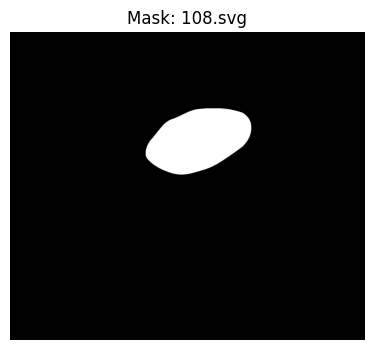

Saved mask: 98.png


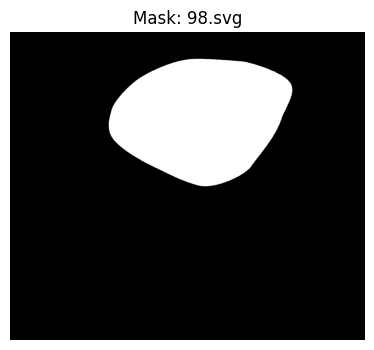

In [5]:
def path_to_points(path_str, n_points=1000, scale=10):
    path = parse_path(path_str)
    points = []
    for i in np.linspace(0, 1, n_points):
        point = path.point(i)
        x, y = int(round(point.real * scale)), int(round(point.imag * scale))
        points.append([x, y])
    return np.array(points, dtype=np.int32)

def extract_paths_and_size(svg_file):
    doc = minidom.parse(svg_file)
    path_strings = [p.getAttribute('d') for p in doc.getElementsByTagName('path')]
    doc.unlink()
    return path_strings, (1320, 1520)  # Sesuai <image> width/height

# Iterate through all SVG files in the input folder
for filename in os.listdir(input_folder):
    if filename.endswith(".svg"):
        svg_file = os.path.join(input_folder, filename)  # Define svg_file here
        output_file = os.path.join(output_folder, filename[:-4] + ".png") # Define output_file here

        path_data_list, image_size = extract_paths_and_size(svg_file)
        mask = np.zeros(image_size, dtype=np.uint8)

        for path_str in path_data_list:
            polygon = path_to_points(path_str, n_points=1000)
            cv2.fillPoly(mask, [polygon], 255)

        output_filename = os.path.splitext(filename)[0] + ".png"
        output_path = os.path.join(output_folder, output_filename)
        cv2.imwrite(output_path, mask)
        print(f"Saved mask: {output_filename}")

        plt.figure(figsize=(6, 4))
        plt.imshow(mask, cmap='gray')
        plt.title(f"Mask: {filename}")
        plt.axis('off')
        plt.show()